In [129]:
import requests
import time
import pprint
import pickle
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import xml.etree.ElementTree as ET
import re
from unicodedata import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV

In [57]:
tablin = pd.read_csv(r'C:\Users\Marta\Desktop\spainml\train.csv')

In [58]:
del tablin['Unnamed: 0']

In [59]:
col_cat= ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [60]:
for col_name in col_cat:
        tablin[col_name]= tablin[col_name].astype('category')

In [61]:
continuous_cols= ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
features = tablin[continuous_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
tablin[continuous_cols] = features

In [62]:
tablin=pd.DataFrame(tablin)

train, test = train_test_split(tablin, test_size = 0.33, random_state = 0)

x_train = train.drop(columns=['default.payment.next.month'])
y_train = train.loc[:,'default.payment.next.month']
x_train = np.asarray(x_train)
y_train = np.asarray(y_train).reshape(len(y_train),1)
x_test = test.drop(columns=['default.payment.next.month'])
y_test = test.loc[:,'default.payment.next.month']
x_test = np.asarray(x_test)
y_test = np.asarray(y_test).reshape(len(y_test),1)

### XGBOOST

In [127]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [131]:
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)

In [147]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.2,'learning_rate': 0.1,
                'max_depth': 30, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,as_pandas=True, seed=123, metrics='auc')

cv_results.head()

#print((cv_results["test-rmse-mean"]).tail(1))

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.688998,0.000164,0.685671,0.000519
1,0.736783,0.013938,0.723215,0.013411
2,0.758543,0.009330,0.747261,0.012115
3,0.770831,0.003261,0.760110,0.004996
4,0.771848,0.001968,0.760672,0.003164


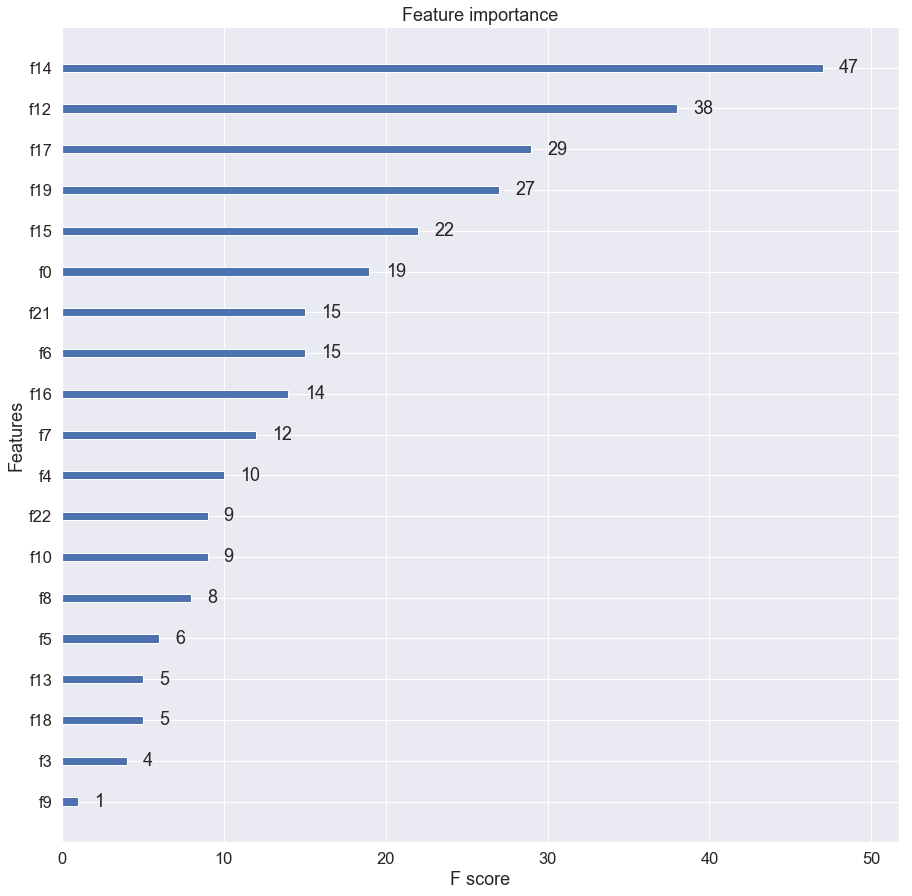

In [138]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

### Decision tree 

In [121]:
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7253918495297805


In [108]:
importances = clf.feature_importances_

In [109]:
imp= dict(zip(data.columns, clf.feature_importances_))

In [128]:
imp

{'LIMIT_BAL': 0.06058194166695716,
 'SEX': 0.014628824949507372,
 'EDUCATION': 0.01863471040466051,
 'MARRIAGE': 0.015568816358343547,
 'AGE': 0.07323413353726248,
 'PAY_0': 0.16214193903220428,
 'PAY_2': 0.03272121080538026,
 'PAY_3': 0.014295110108116129,
 'PAY_4': 0.007344096259170094,
 'PAY_5': 0.00917675674076126,
 'PAY_6': 0.012332249995436497,
 'BILL_AMT1': 0.05389722547894914,
 'BILL_AMT2': 0.047624529502774356,
 'BILL_AMT3': 0.046127117639112133,
 'BILL_AMT4': 0.052793966700306,
 'BILL_AMT5': 0.04175146875515618,
 'BILL_AMT6': 0.043304837013918726,
 'PAY_AMT1': 0.05244031013246777,
 'PAY_AMT2': 0.042697485957919064,
 'PAY_AMT3': 0.05948296998815099,
 'PAY_AMT4': 0.04318494161905091,
 'PAY_AMT5': 0.04534124079506632,
 'PAY_AMT6': 0.050694116559328775}

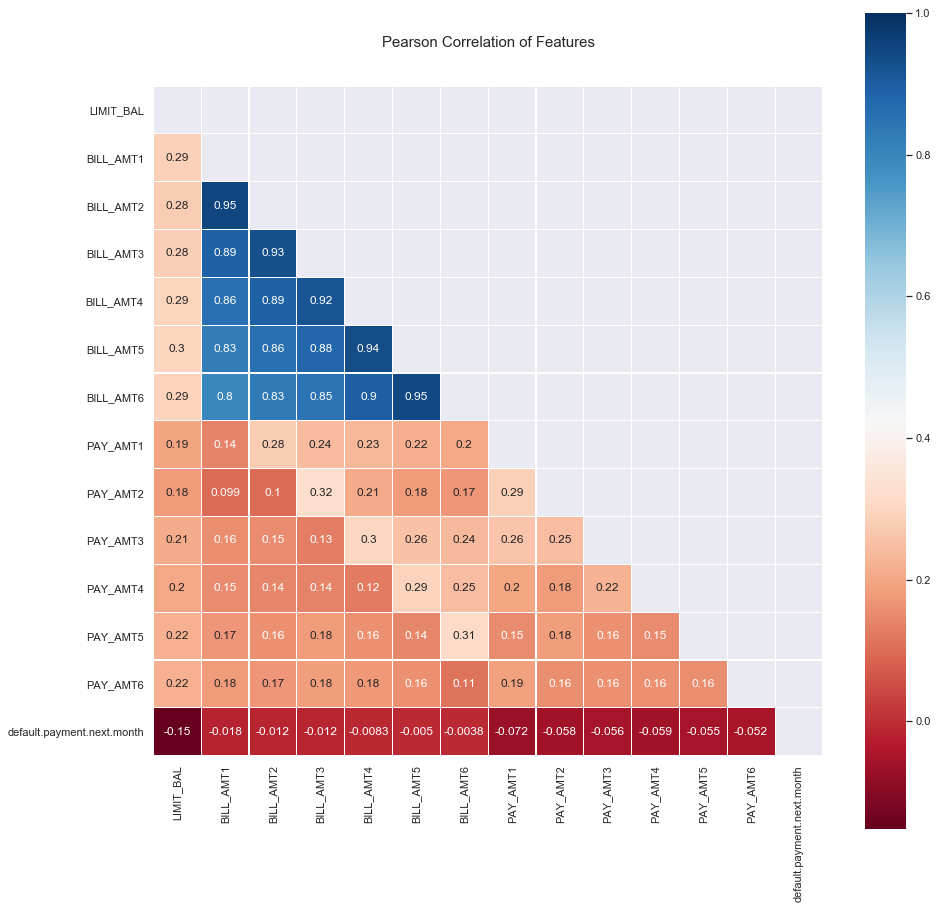

In [126]:
#CORRELATION MATRIX

iris_corr = tablin.corr()
mask = np.zeros_like(iris_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
colormap = plt.cm.RdBu
plt.figure(figsize=(15,15))
sns.set(font_scale=1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(iris_corr,linewidths=0.1,vmax=1.0, mask=mask,
            square=True, cmap=colormap, linecolor='white', annot=True)